# Import and Config

In [1]:
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import LinearLocator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import arcsine, norm
import types
import itertools, random

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd.functional import jacobian

from common import *
from initialize import *
from my_datasets import *
from my_models import *


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

/Users/nacho/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


device(type='cpu')

# Weight Distribution

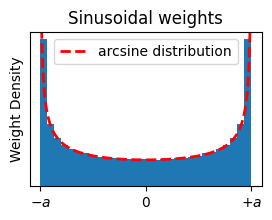

In [2]:
# U-shaped distribution of a sinusoidally-initialized weight vector

input_shape = (10, 10000)
weights = torch.empty(size=(input_shape[-1], input_shape[-1]))
sinusoidal_(weights)

weights_flat = weights.flatten().detach().numpy()
amplitude = np.max(np.abs(weights_flat))

fig, ax = plt.subplots(figsize=(3, 2))
ax.hist(weights_flat, bins=30, density=True)

# For comparison: arcsine pdf in [-a, a] scaled
x = np.linspace(0, 1, 400)
x_plot = (x - 0.5) * amplitude * 2
ax.plot(
    x_plot,
    arcsine.pdf(x) * 35,
    lw=2,
    linestyle="--",
    color='r',
    label='arcsine distribution'
)

ax.set_xticks(ticks=[-amplitude, 0, amplitude], labels=["$-a$", "0", "$+a$"])
ax.set_yticks([])
ax.set_ylabel("Weight Density")
ax.set_title("Sinusoidal weights")
ax.set_ylim(0, 130)
ax.legend()

plt.show()


# Weight Colormap

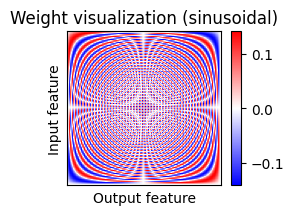

In [3]:
# Colormap of a sinusoidally initialized weight matrix

weights = torch.empty(size=(101, 101))
sinusoidal_(weights)      # sinusoidal init
weights_np = weights.detach().numpy()

fig, ax = plt.subplots(figsize=(3, 2))
cmap = plt.get_cmap('bwr')  # diverging colormap

img = ax.imshow(
    weights_np,
    cmap=cmap,
    vmin=np.min(weights_np),
    vmax=np.max(weights_np),
    aspect="equal"
)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size=0.1, pad=0.1)
cbar = fig.colorbar(img, cax=cax)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("Output feature")
ax.set_ylabel("Input feature")
ax.set_title("Weight visualization (sinusoidal)")

plt.show()
